# Python_Assignment

In [1]:
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd

We are creating a function called 'get sequence_from file'. This function will take as input any fasta file called "fasta_fn"
they are craeting a dictionary, create afoward loop which for every fasta file will first isolate the description, then create string species name made of the second and third element of the description. Next we use each species name as a key in a dictionary and the sequence as its value
This function is to parse the fasta file

In [3]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)

In [4]:
d = get_sequences_from_file('penguins_cytb.fasta')

In [5]:
print(d)

{'Aptenodytes forsteri': Seq('ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()), 'Aptenodytes patagonicus': Seq('ATGGCCCCAAACCTCCGAAAATCCCATCCTCTCCTAAAAATAATTAATAACTCC...TAA', SingleLetterAlphabet()), 'Eudyptes chrysocome': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()), 'Eudyptes chrysolophus': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()), 'Eudyptes sclateri': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCCCTCCTAAAAACAATCAATAACTCC...TAA', SingleLetterAlphabet()), 'Eudyptula minor': Seq('ATGGCCCCCAACCTCCGAAAATCTCACCCCCTCCTAAAAATAATCAACAACTCT...TAA', SingleLetterAlphabet()), 'Pygoscelis adeliae': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATTAACAACTCC...TAA', SingleLetterAlphabet()), 'Pygoscelis antarctica': Seq('ATGGCCCCCAACCTCCGAAAATCCCACCCTCTCCTAAAAATAATCAACAACTCC...TAG', SingleLetterAlphabet()), 'Pygoscelis papua': Seq('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAAT

Next we want to write

In [8]:
def translate_function(string_nucleotides): 
     mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
     aa_seq_string = []
     index = 0
        
     for pos in range(0,len(string_nucleotides)//3):
        codon = string_nucleotides[index:index+3]
        index += 3
        if codon == "TAA" or codon == "TAG" or codon == "AGA" or codon == "AGG":
            break
        else:
            aa = mito_table.forward_table[codon]
            aa_seq_string.append(aa)
            
     return(aa_seq_string)

In [9]:
sequence = "ATGGCCCCAAATCTCCGAAAATCCCATCCCCTCCTAAAAATAATTAATAACTCC"
print(translate_function(sequence))

['M', 'A', 'P', 'N', 'L', 'R', 'K', 'S', 'H', 'P', 'L', 'L', 'K', 'M', 'I', 'N', 'N', 'S']


In [ ]:
Alternative translation function
Here, we shall use Biopython library called "Alphabet"

In [11]:
from Bio.Alphabet import generic_dna
from Bio.Seq import Seq

In [12]:
def alternative_translation(dna_seq):
    sequence = Seq(str(dna_seq), generic_dna)
    aa_seq = sequence.translate(table = 2, to_stop = True)
    return(aa_seq)

In [13]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [14]:
def compute_molecular_weight(aa_seq):
    analyzed_seq = ProteinAnalysis(str(aa_seq))
    m_weight= analyzed_seq.molecular_weight()
    return(m_weight)

In [15]:
def gc_content(dna_seq):
    count = dna_seq.count("G") + dna_seq.count("C")
    gc = 100 * count / len(dna_seq)
    return(gc)

In [ ]:
Put comment for all the above

Using the function*get_sequences_from_file* to get the swquence from penguins_cytb.fasta file in the repository
Using pandasto read in the csv data frame of the body mass in the repository
Creating a list of the species names from the body mass data frame

In [16]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta")
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass
species_list = list(penguins_df.species)

In [ ]:
Here, i added two additional columns to the *penguins_df* nemed Molecular _weight and GC_content, and used the package **Numpy** to fill with NAS that stand for missing values

In [18]:
import numpy as np
penguins_df = penguins_df.assign(Molecular_weight = np.nan, GC_content = np.nan)

In [21]:
for key, value in cytb_seqs.items():
    aa_seq = alternative_translation(value)
    mol_weight = compute_molecular_weight(aa_seq)
    gc_cont = gc_content(value)
    index = penguins_df[penguins_df["species"] == key].index
    penguins_df.Molecular_weight[index] = mol_weight
    penguins_df.GC_content[index] = gc_cont

/Users/yosiamugume/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/yosiamugume/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [22]:
print(penguins_df)
print(species_list)

                    species   mass  Molecular_weight  GC_content
0      Aptenodytes forsteri  28.00        42459.6021   48.381452
1   Aptenodytes patagonicus  13.40        42563.7067   49.693788
2       Eudyptes chrysocome   2.80        42475.5753   51.181102
3     Eudyptes chrysolophus   4.50        42445.5493   50.918635
4         Eudyptes sclateri   4.25        42475.5753   50.831146
5           Eudyptula minor   1.60        42491.6408   49.256343
6        Pygoscelis adeliae   4.60        42458.6140   49.081365
7     Pygoscelis antarctica   4.10        42404.5423   47.769029
8          Pygoscelis papua   6.10        42595.8759   47.156605
9       Spheniscus demersus   3.20        42431.5490   48.293963
10     Spheniscus humboldti   4.75        42399.5520   49.256343
11  Spheniscus magellanicus   3.40        42459.6021   48.206474
['Aptenodytes forsteri', 'Aptenodytes patagonicus', 'Eudyptes chrysocome', 'Eudyptes chrysolophus', 'Eudyptes sclateri', 'Eudyptula minor', 'Pygoscelis ade

To ensure that my plot will be displayed in jupiter notebooki will call matplotlib%matplotlib inline

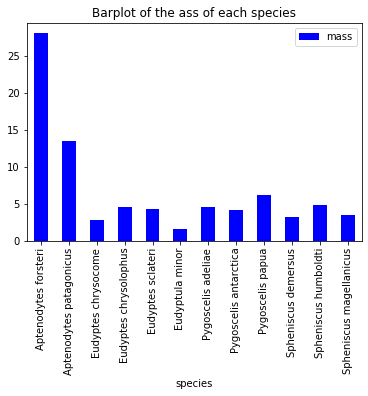

In [24]:
penguins_df.plot(x = "species", y= "mass", kind = "bar", color = "blue",
                title = "Barplot of the mass of each species")

In [29]:
import seaborn as sbn

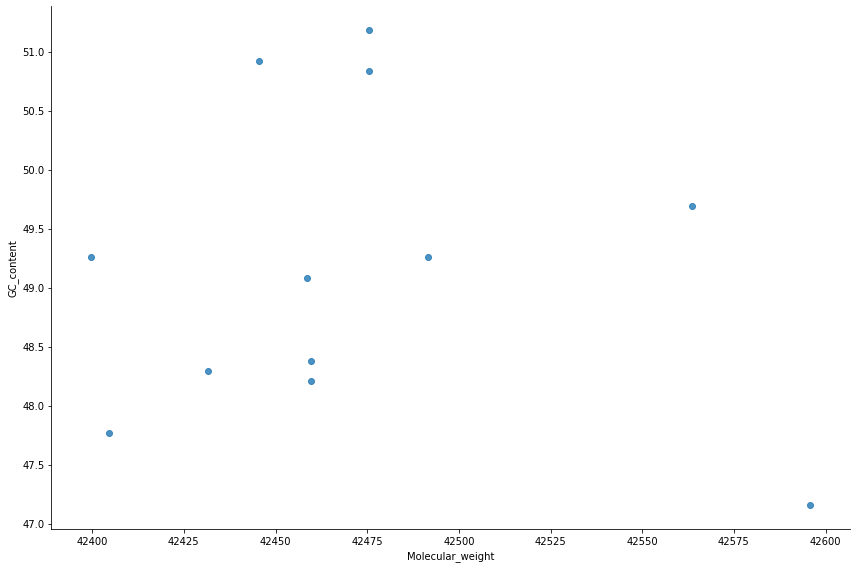

In [30]:
sbn.lmplot("Molecular_weight","GC_content", data = penguins_df,
          fit_reg = False, height = 8, aspect = 1.5)

In [31]:
penguins_df.to_csv ("penguins_mass_cytb.csv")

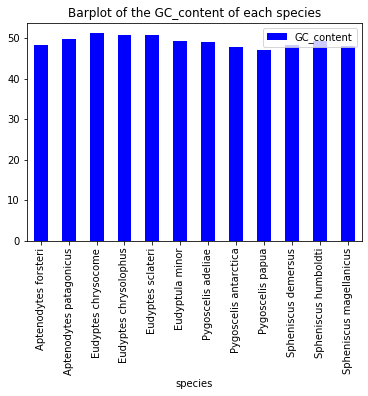

In [28]:
penguins_df.plot(x = "species", y= "GC_content", kind = "bar", color = "blue",
                title = "Barplot of the GC_content of each species")